In [ ]:
print('hello world')

hello world


In [2]:
import os
import pandas as pd

In [3]:
df = pd.read_csv('/content/cereal.csv')

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    5.0       6     280        25      3     1.0  0.33  68.402973   
1    8.0       8     135         0      3     1.0  1.00  33.983679   
2    7.0       5     320        25      3     1.0  0.33  59.425505   
3    8.0       0     330        25      3     1.0  0.50  93.704912   
4   14.0       8      -1        25      3     1.0  0.75  34.384843   

   health_score  
0      1.428571  
1      0.222222  
2      1.500000  
3     14.000000  
4      0

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


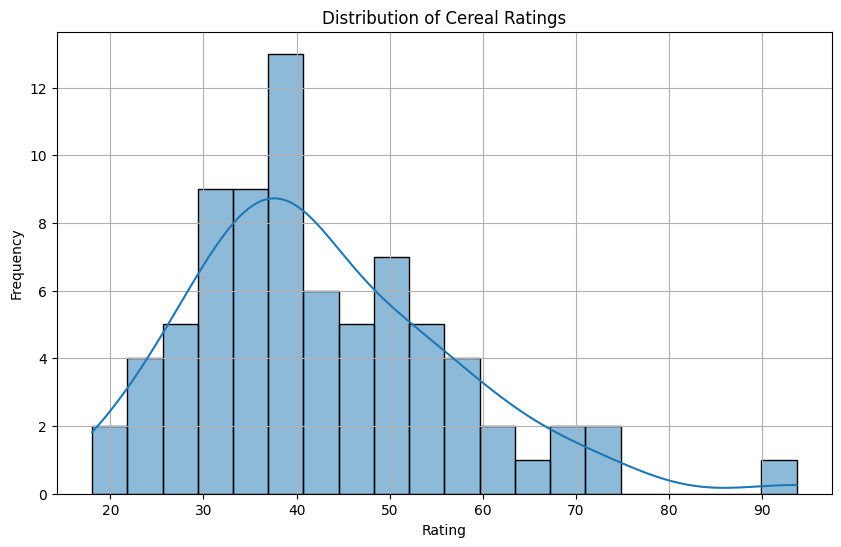

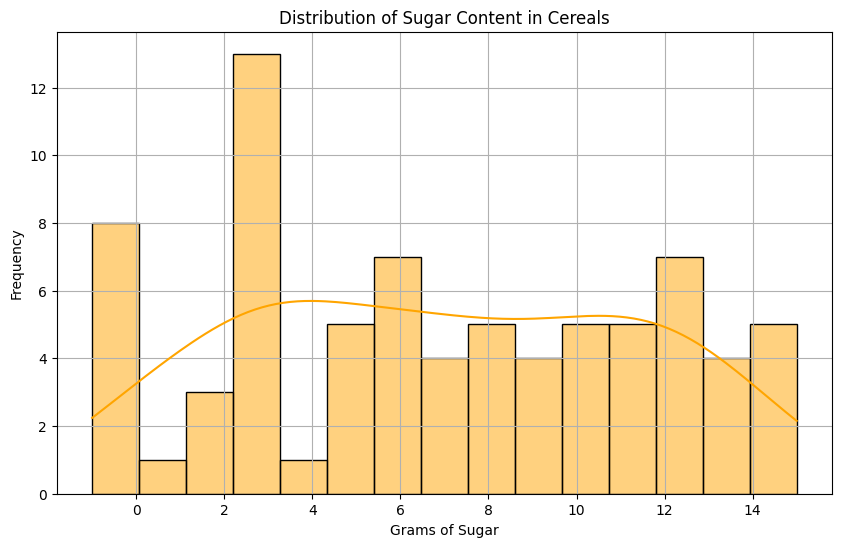

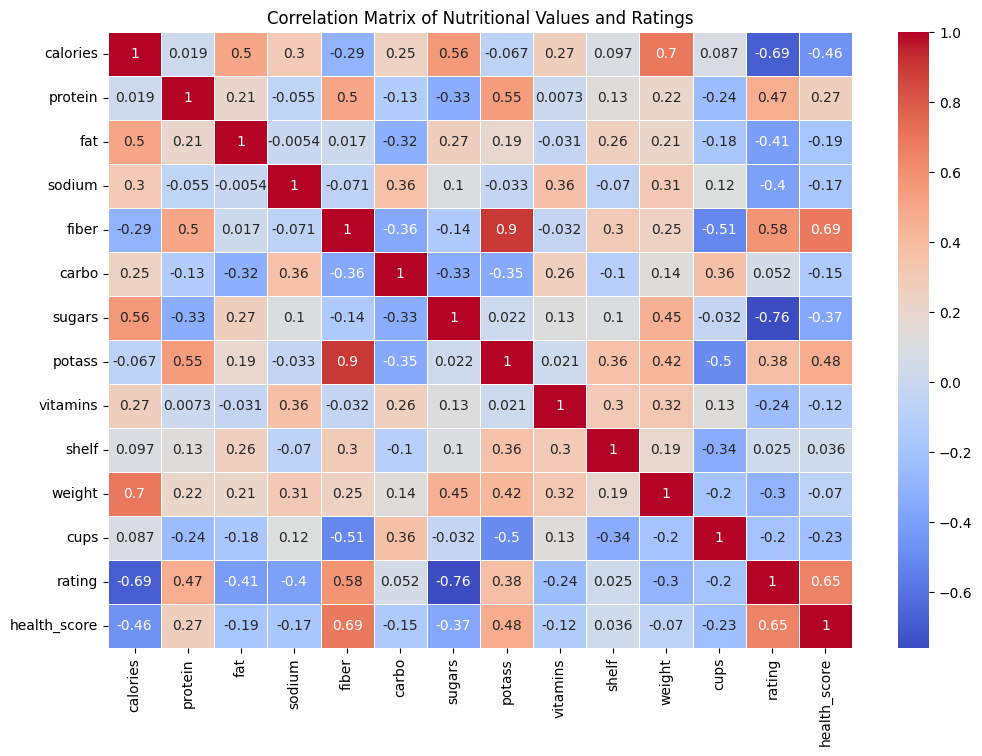

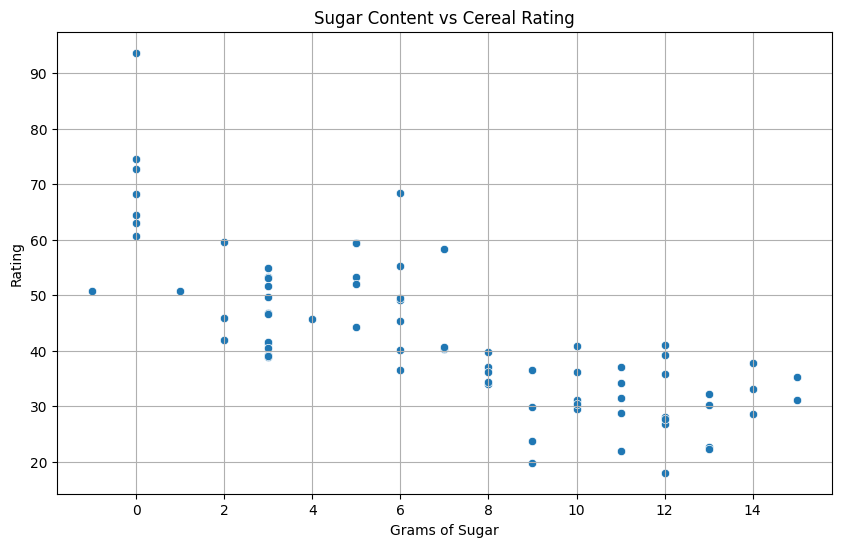

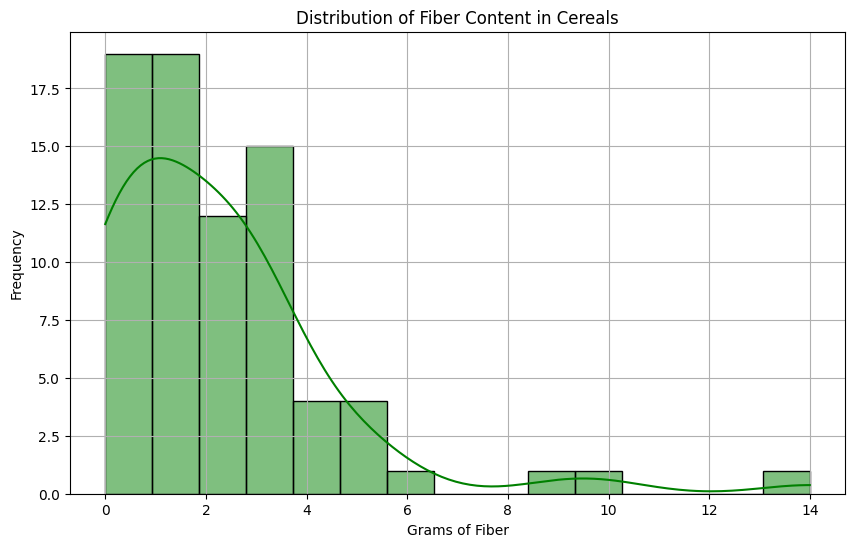

Top 10 Healthiest Cereals:
                         name  fiber  sugars  health_score
57             Quaker Oatmeal    2.7      -1           inf
3   All-Bran with Extra Fiber   14.0       0     14.000000
64     Shredded Wheat 'n'Bran    4.0       0      4.000000
63             Shredded Wheat    3.0       0      3.000000
65  Shredded Wheat spoon size    3.0       0      3.000000
2                    All-Bran    9.0       5      1.500000
0                   100% Bran   10.0       6      1.428571
55               Puffed Wheat    1.0       0      1.000000
11                   Cheerios    2.0       1      1.000000
50          Nutri-grain Wheat    3.0       2      1.000000


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows to understand the data
print(df.head())

# Basic information about the dataset
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics for numerical columns

# Step 2: Check for missing values
print(df.isnull().sum())

# Step 3: Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Analyze Sugar Content
plt.figure(figsize=(10, 6))
sns.histplot(df['sugars'], bins=15, kde=True, color='orange')
plt.title('Distribution of Sugar Content in Cereals')
plt.xlabel('Grams of Sugar')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Nutritional Values and Ratings')
plt.show()

# Step 6: Scatter plot between sugar and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugars', y='rating', data=df)
plt.title('Sugar Content vs Cereal Rating')
plt.xlabel('Grams of Sugar')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Step 7: Analyze fiber content (healthier cereals)
plt.figure(figsize=(10, 6))
sns.histplot(df['fiber'], bins=15, kde=True, color='green')
plt.title('Distribution of Fiber Content in Cereals')
plt.xlabel('Grams of Fiber')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 8: Identify the healthiest cereals (those with high fiber, low sugar)
# Define a simple health score: high fiber, low sugar
df['health_score'] = df['fiber'] / (df['sugars'] + 1)  # Adding 1 to avoid division by zero

# Top 10 healthiest cereals
healthiest_cereals = df.sort_values(by='health_score', ascending=False).head(10)
print("Top 10 Healthiest Cereals:")
print(healthiest_cereals[['name', 'fiber', 'sugars', 'health_score']])